# 第一次作业

## 准备工作

### 定义目标函数

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def obj(x):
    '''
    :param x: 输入向量，1×6
    :return: 函数值
    '''
    t = np.linspace(0.1, 0.6, 6)
    #print(t)
    y = np.exp(-t) - 5 * np.exp(-10 * t) + 3 * np.exp(-4 * t)
    #print(y)
    r = x[2] * np.exp(-t * x[0]) - x[3] * np.exp(-t * x[1]) + x[5] * np.exp(-t * x[4]) - y

    return np.sum(np.square(r))


np.linspace(0.1, 0.6, 6)
obj(np.array([1, 2, 1, 1, 1, 1]))

0.5986966142557127

### 使用数值导数计算梯度

In [4]:
# 求梯度
def gradient(x):
    """

    :param x: 当前坐标
    :return: 梯度向量
    """
    gradient_vec = np.zeros_like(x, dtype=float)
    for i in range(6):
        eps = np.zeros_like(x, dtype=float)
        eps[i] += 1e-5
        #print(eps)
        gradient_vec[i] = (obj(x + eps) - obj(x - eps)) / (2*1e-5)
    return gradient_vec


gradient(np.array([1, 2, 1, 1, 1, 1]))

array([ 0.63860628, -0.46546605, -2.26478223,  1.71783155,  0.63860628,
       -2.26478223])

### 梯度解析解

In [5]:
# 求梯度
def gradient2(x):
    """

    :param x: 当前坐标
    :return: 梯度向量
    """
    
    t = np.linspace(0.1, 0.6, 6)
    y = np.exp(-t) - 5 * np.exp(-10 * t) + 3 * np.exp(-4 * t)
    r = x[2] * np.exp(-t * x[0]) - x[3] * np.exp(-t * x[1]) + x[5] * np.exp(-t * x[4]) - y
    
    
    dr = 2*r
    dx1 = np.sum(dr*(-t*x[2]*np.exp(-t*x[0])),axis=0)
    dx2 = -np.sum(dr*(-t*x[3]*np.exp(-t*x[1])),axis=0)
    dx3 = np.sum(dr*np.exp(-t*x[0]),axis=0)
    dx4 = np.sum(dr*(-np.exp(-t*x[1])),axis=0)
    dx5 = np.sum(dr*(-t*x[5]*np.exp(-t*x[4])),axis=0)
    dx6 = np.sum(dr*np.exp(-t*x[4]),axis=0)
    gradient_vec = np.array([dx1,dx2,dx3,dx4,dx5,dx6])
    
    return gradient_vec


gradient2(np.array([1, 2, 1, 1, 1, 1]))

array([ 0.63860628, -0.46546605, -2.26478223,  1.71783155,  0.63860628,
       -2.26478223])

## 初步优化

### 梯度下降

In [50]:
# 梯度下降法
def GradientDescent(initpoint,loop_num=5000, alpha=0.05,plot=False):
    CurValue = obj(initpoint)
    CurPoint = initpoint
    valuelist = [CurValue]

    x = np.zeros((loop_num+1,initpoint.shape[0]))
    x[0,:] = initpoint
    if plot:
        loss = np.zeros(loop_num)


    for i in range(1,loop_num+1):
        
        grad = gradient(x[i-1,:])
        x[i,:] = x[i-1,:] - alpha * grad
        if plot:
            loss[i-1] = obj(x[i-1,:])
        if i==5000: 
            print(grad)
            print(gradient2(x[i-1,:]))
    return x[loop_num],loss


x0,y0=GradientDescent(np.array([1, 2, 1, 1, 1, 1]),5000, 0.2,plot=True)


[-3.50765647e-04  9.47203283e-05 -1.30826579e-04 -3.06584947e-04
 -3.50765647e-04 -1.30826578e-04]
[-3.50765646e-04  9.47203884e-05 -1.30826578e-04 -3.06584947e-04
 -3.50765646e-04 -1.30826578e-04]


Text(0.5, 1.0, '梯度下降迭代情况')

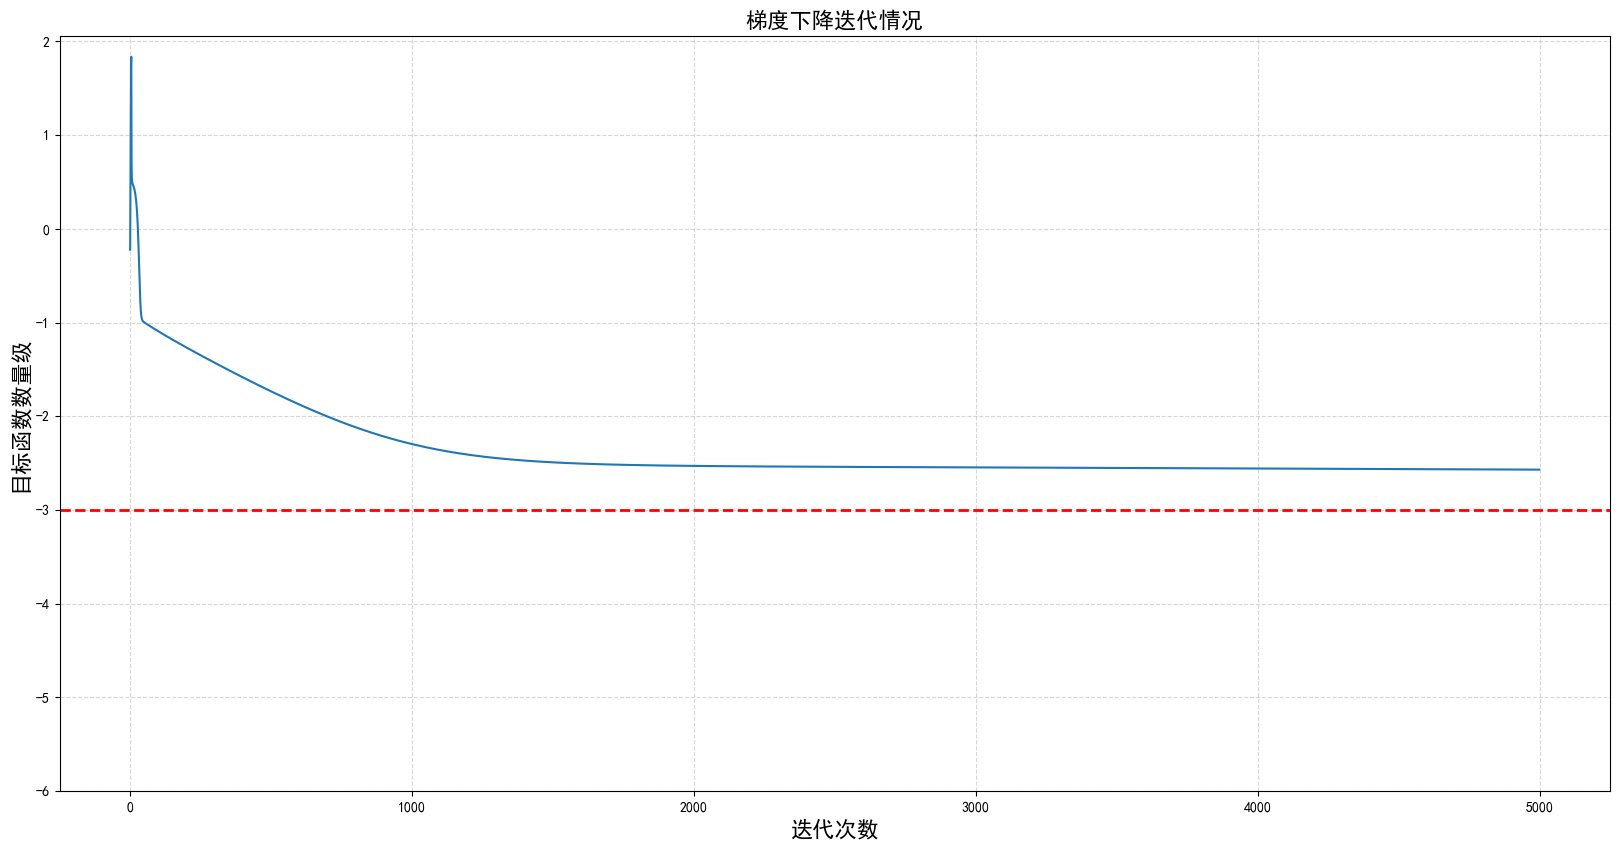

In [16]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10),dpi=100)
plt.plot(np.arange(5000),np.log10(y0))
plt.grid(True,linestyle='--',alpha=0.5)
plt.yticks(range(-6,3,1))
plt.axhline(y=-3, c="r", ls="--", lw=2)
plt.xlabel("迭代次数",fontdict={'size': 16})
plt.ylabel("目标函数数量级",fontdict={'size': 16})
plt.title("梯度下降迭代情况",fontdict={'size': 16})

### AdaGrad

主要思想：不同维度根据历史情况给予不同的学习率

$x_{i+1}=x_{i}-{\eta\over G_i+\epsilon}*grad$

$G_i=\sqrt{\sum^i_{j=0}grad_j\odot grad_j}$

In [48]:
# 试试adagrad
def adaGrad(cur_point, gradarray, eta, i):
    kidarray = gradarray[:i + 1, :]
    delta_x = gradarray[i, :] / np.sqrt(np.sum(np.square(kidarray), axis=0)) * eta
    return cur_point - delta_x


def AdaGradDescent(initpoint, loop_num=1000, eta=1, plot=False):
    gradarray = np.zeros((loop_num, initpoint.shape[0]))
    point = initpoint
    if plot:
        loss = np.zeros(loop_num)
    for i in range(loop_num):
        gradarray[i, :] = gradient2(point)
        point = adaGrad(point, gradarray, eta, i)
        if plot:
            loss[i] = obj(point)

    if plot:
        return obj(point), point, loss
    else:
        return obj(point), point

start = np.array([1,2,1,1,1,1])
start.shape = (6,)
value, point, y1 = AdaGradDescent(start, loop_num=5000, eta=1, plot=True)

Text(0.5, 1.0, 'AdaGrad迭代情况')

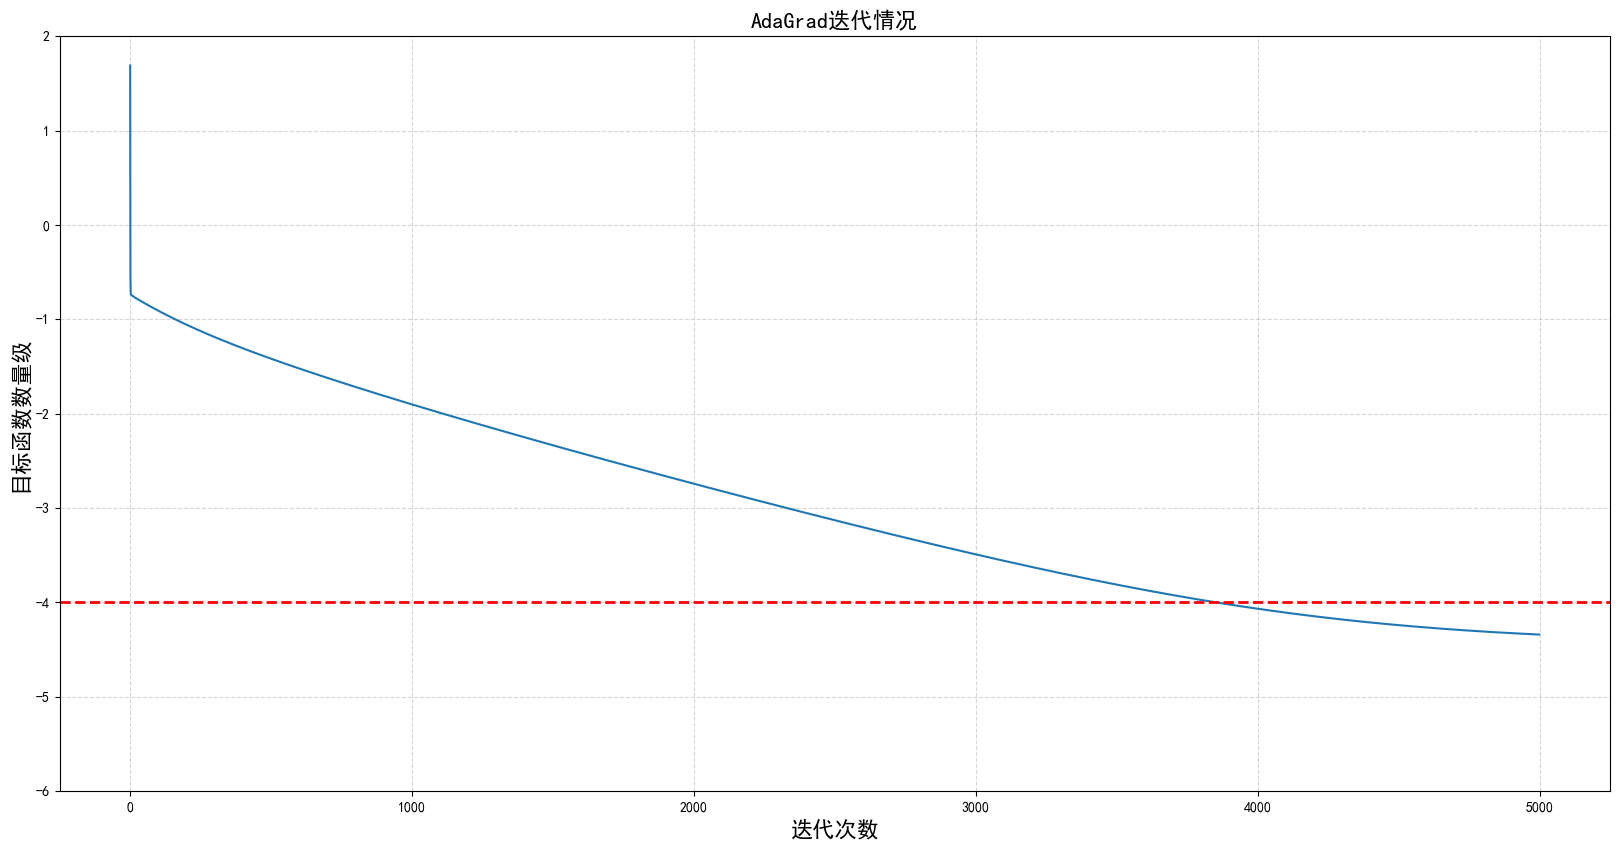

In [17]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10),dpi=100)
plt.plot(np.arange(5000),np.log10(y1))
plt.grid(True,linestyle='--',alpha=0.5)
plt.yticks(range(-6,3,1))
plt.axhline(y=-4, c="r", ls="--", lw=2)
plt.xlabel("迭代次数",fontdict={'size': 16})
plt.ylabel("目标函数数量级",fontdict={'size': 16})
plt.title("AdaGrad迭代情况",fontdict={'size': 16})

### AdaDelta

AdaDelta是为了解决AdaGrad的缺点而发明的
AdaGrad缺点：需要自己手动指定初始学习率，而且由于分母中对历史梯度一直累加，学习率将逐渐下降至0，并且如果初始梯度很大的话，会导致整个训练过程的学习率一直很小，从而导致学习时间变长。
$s_t=\rho s_{t-1}+(1-\rho)g_t\odot g_t$

这里改进了AdaGrad的累加，给前面的加入了一个衰减参数$\rho$,防止到后期学习率太低

$g^{'}_t\leftarrow\sqrt{{\Delta x_{t-1}\quad+\epsilon \over s_t+\epsilon}}\odot g_t$

${\eta\over \sqrt{s_t+\epsilon}}$

$x_t\leftarrow x_{t-1}-g^{'}_t$



$\Delta x_t\leftarrow \rho \Delta x_{t-1}+(1-\rho)g^{'}_t\odot g^{'}_t$

利用牛顿法的思想，确定步长

In [59]:
def adaDelta1(x, gradarray, s, delta_x, rho, i, eps=1e-5):
    
    
    s[i,:] = rho * s[i - 1, :] + (1 - rho) * gradarray[i, :] * gradarray[i, :]

    g_skim = np.sqrt((delta_x[i - 1, :] + eps) / (s[i, :] + eps)) * gradarray[i, :]

    x[i, :] = x[i - 1] - g_skim

    delta_x[i, :] = rho * delta_x[i - 1, :] + (1 - rho) * g_skim * g_skim
    return x, s, delta_x

def adaDeltaDescent1(initpoint, loop_num=1000, rho=0.9, plot=False):
    # 需要注意第一次
    x = np.zeros((loop_num + 1, initpoint.shape[0]))
    s = np.zeros_like(x)
    delta_x = np.zeros_like(x)
    gradarray = np.zeros_like(x)
    # 第一次
    x[0, :] = initpoint

    if plot:
        loss = np.zeros(loop_num)

    for i in range(1, loop_num + 1):
        gradarray[i, :] = gradient(x[i - 1, :])
        x, s, delta_x = adaDelta1(x, gradarray, s, delta_x, rho, i)
        if plot:
            loss[i - 1] = obj(x[i - 1, :])

    if plot:
        return obj(x[loop_num]), x, loss
    else:
        return obj(x[loop_num]), x


value2, point2, y2 = adaDeltaDescent1(start, 5000, 0.99, plot=True)

Text(0.5, 1.0, 'AdaDelta迭代情况')

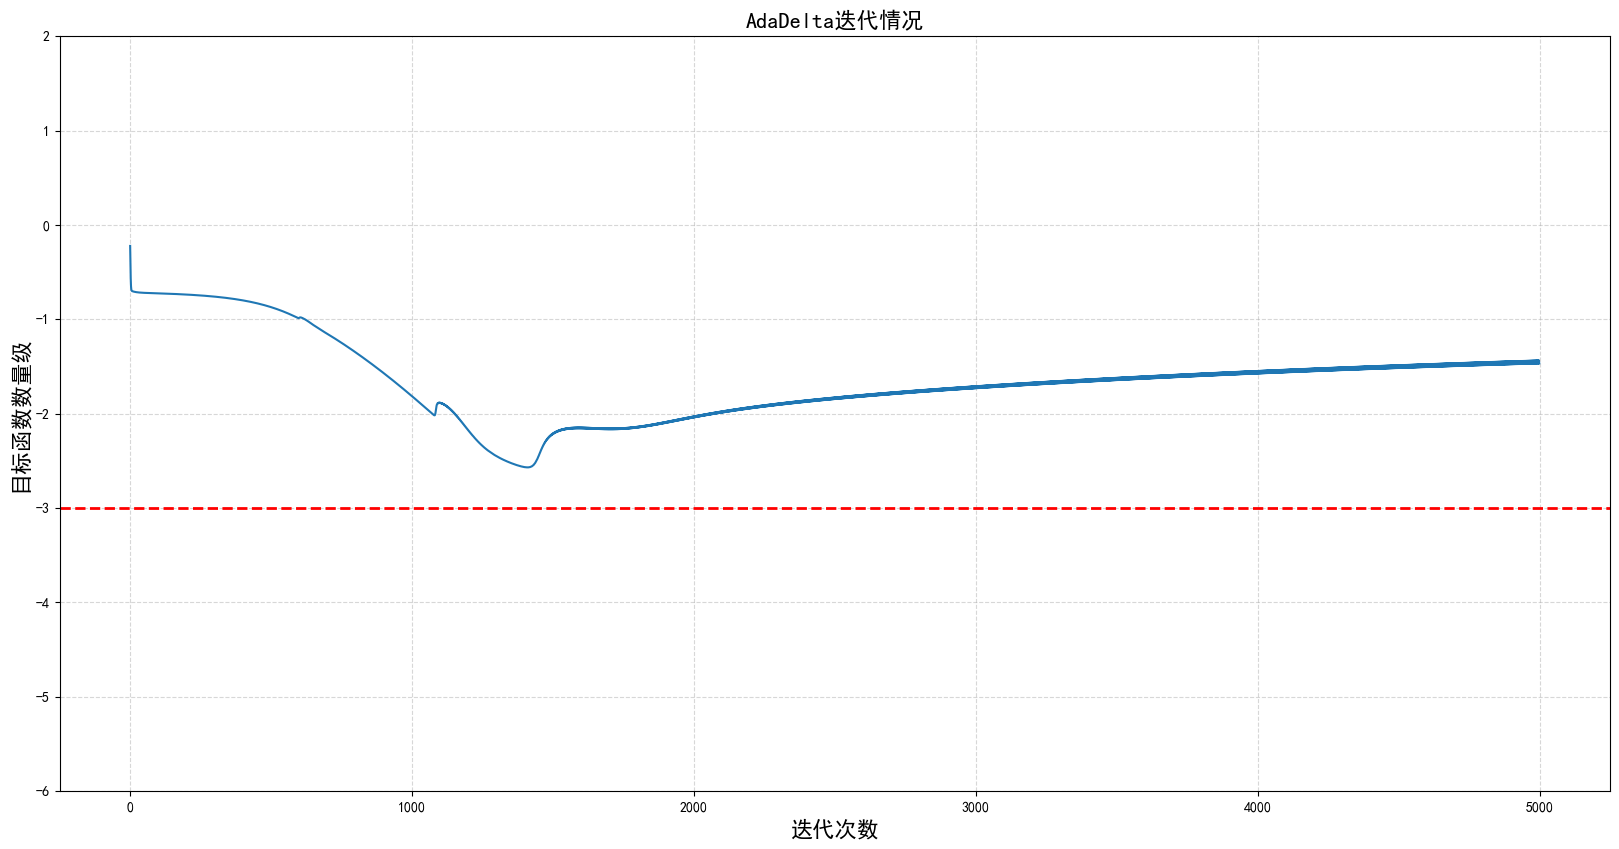

In [60]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10),dpi=100)
plt.plot(np.arange(5000),np.log10(y2))
plt.grid(True,linestyle='--',alpha=0.5)
plt.yticks(range(-6,3,1))
plt.axhline(y=-3, c="r", ls="--", lw=2)
plt.xlabel("迭代次数",fontdict={'size': 16})
plt.ylabel("目标函数数量级",fontdict={'size': 16})
plt.title("AdaDelta迭代情况",fontdict={'size': 16})

### AdaDelta优化

AdaDelta二阶动量是固定时间窗口内的累积，随着时间窗口的变化，遇到的数据可能发生巨变，使得学习率$\eta_t=\sqrt{{\Delta x_{t-1}\quad+\epsilon \over s_t+\epsilon}}$
 可能会时大时小，不是单调变化。这就可能在训练后期引起学习率的震荡，导致模型无法收敛。

这篇文章也给出了一个修正的方法。由于Adam中的学习率主要是由二阶动量控制的，为了保证算法的收敛，可以对二阶动量的变化进行控制，避免上下波动。
$s_t=\max(\rho s_{t-1}+(1-\rho)g_t\odot g_t, s_{t-1})$

In [61]:
def adaDelta2(x, gradarray, s, delta_x, rho, i, eps=1e-5):
    if np.linalg.norm(rho * s[i - 1, :] + (1 - rho) * gradarray[i, :] * gradarray[i, :]) > np.linalg.norm(s[i - 1, :]):
        s[i,:] = rho * s[i - 1, :] + (1 - rho) * gradarray[i, :] * gradarray[i, :]
    else:
        s[i,:] = s[i-1,:]

    g_skim = np.sqrt((delta_x[i - 1, :] + eps) / (s[i, :] + eps)) * gradarray[i, :]

    x[i, :] = x[i - 1] - g_skim

    delta_x[i, :] = rho * delta_x[i - 1, :] + (1 - rho) * g_skim * g_skim
    return x, s, delta_x


def adaDeltaDescent2(initpoint, loop_num=1000, rho=0.9, plot=False):
    # 需要注意第一次
    x = np.zeros((loop_num + 1, initpoint.shape[0]))
    s = np.zeros_like(x)
    delta_x = np.zeros_like(x)
    gradarray = np.zeros_like(x)
    # 第一次
    x[0, :] = initpoint

    if plot:
        loss = np.zeros(loop_num)

    for i in range(1, loop_num + 1):
        gradarray[i, :] = gradient(x[i - 1, :])
        x, s, delta_x = adaDelta2(x, gradarray, s, delta_x, rho, i)
        if plot:
            loss[i - 1] = obj(x[i - 1, :])

    if plot:
        return obj(x[loop_num]), x, loss
    else:
        return obj(x[loop_num]), x


value2, point2, y2 = adaDeltaDescent2(np.array([1,2,1,1,1,1]), 5000, 0.99, plot=True)

Text(0.5, 1.0, 'AdaDelta改迭代情况')

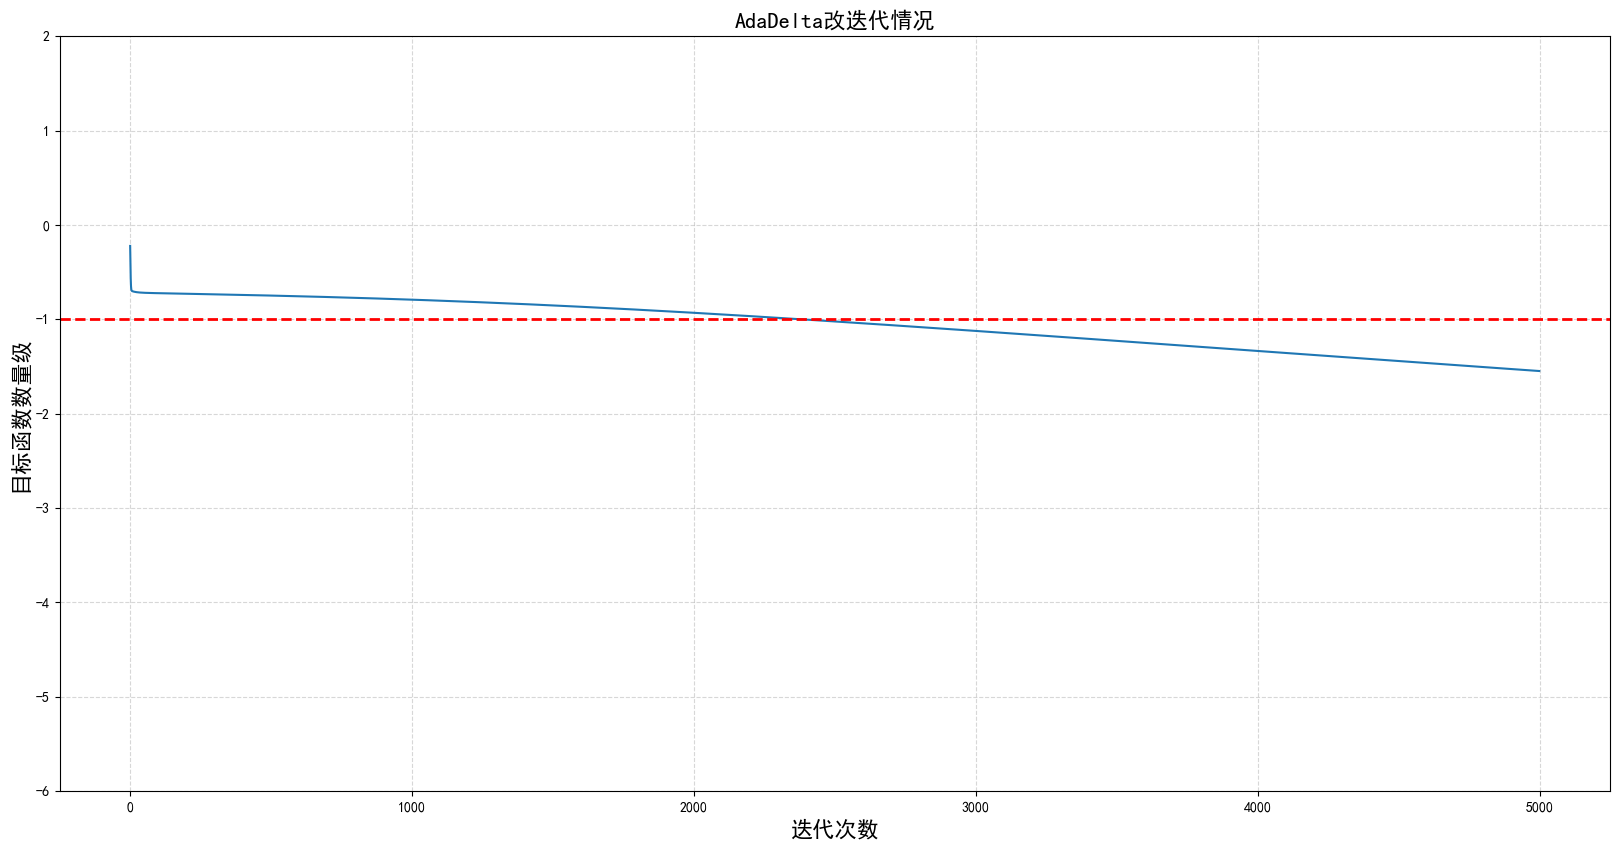

In [62]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10),dpi=100)
plt.plot(np.arange(5000),np.log10(y2))
plt.grid(True,linestyle='--',alpha=0.5)
plt.yticks(range(-6,3,1))
plt.axhline(y=-1, c="r", ls="--", lw=2)
plt.xlabel("迭代次数",fontdict={'size': 16})
plt.ylabel("目标函数数量级",fontdict={'size': 16})
plt.title("AdaDelta改迭代情况",fontdict={'size': 16})
# 载入史册 https://blog.csdn.net/yinyu19950811/article/details/90476956

## 探索精度极限

### 梯度下降

[-0.00197318 -0.00736184 -0.00114748 -0.00601026 -0.00197318 -0.00114748]
[-0.00197318 -0.00736184 -0.00114748 -0.00601026 -0.00197318 -0.00114748]


Text(0.5, 1.0, '梯度下降迭代情况')

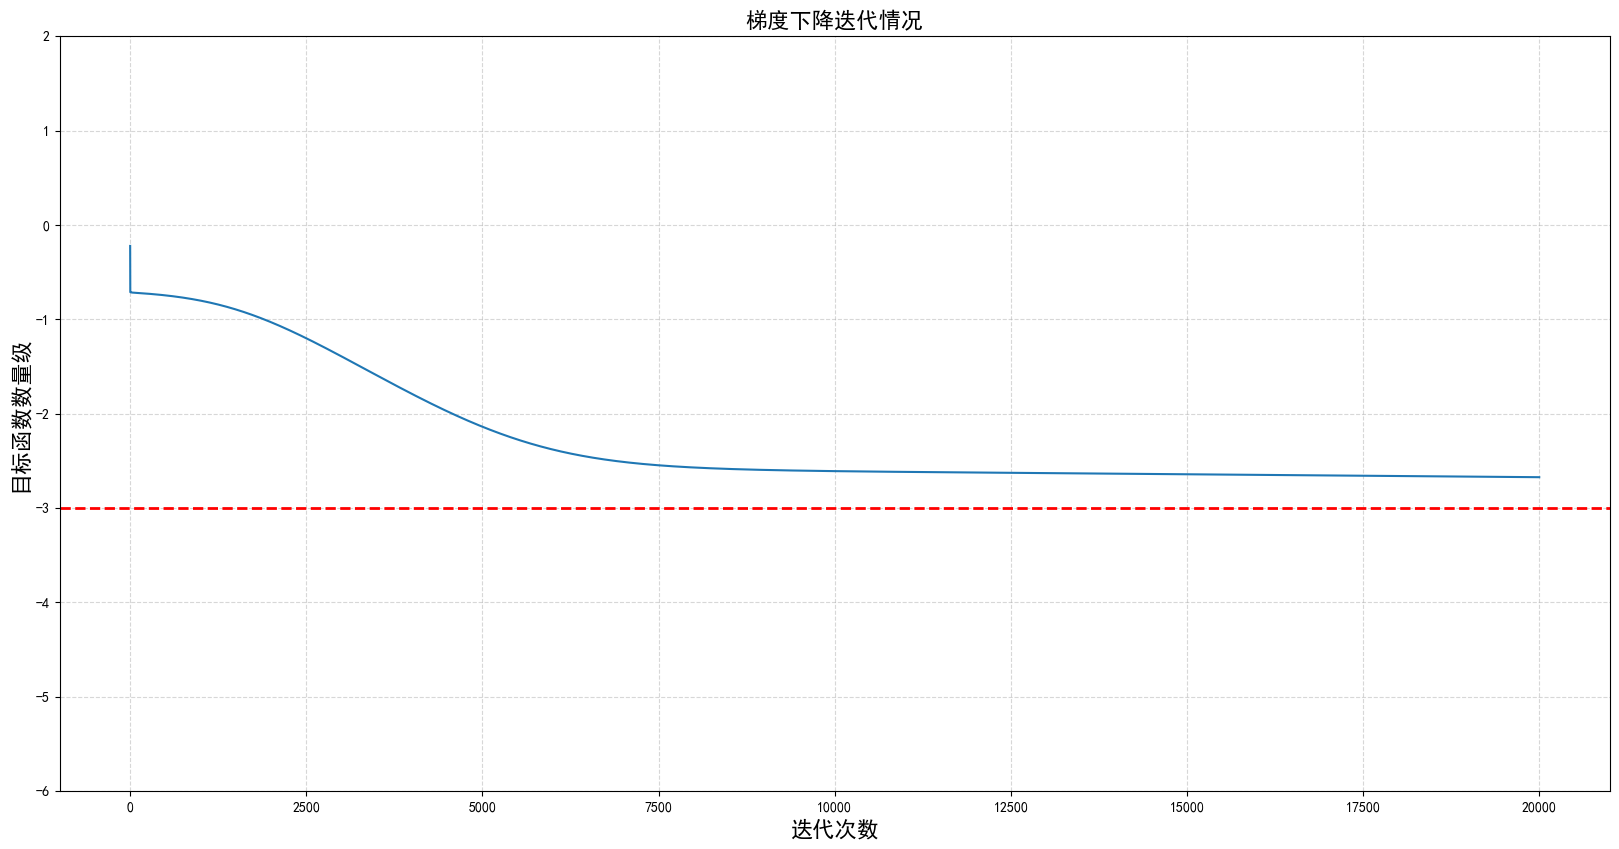

In [29]:
x0,y0=GradientDescent(np.array([1, 2, 1, 1, 1, 1]),20000, 0.05,plot=True)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10),dpi=100)
plt.plot(np.arange(20000),np.log10(y0))
plt.grid(True,linestyle='--',alpha=0.5)
plt.yticks(range(-6,3,1))
plt.axhline(y=-3, c="r", ls="--", lw=2)
plt.xlabel("迭代次数",fontdict={'size': 16})
plt.ylabel("目标函数数量级",fontdict={'size': 16})
plt.title("梯度下降迭代情况",fontdict={'size': 16})

### AdaGrad

Text(0.5, 1.0, 'AdaGrad迭代情况')

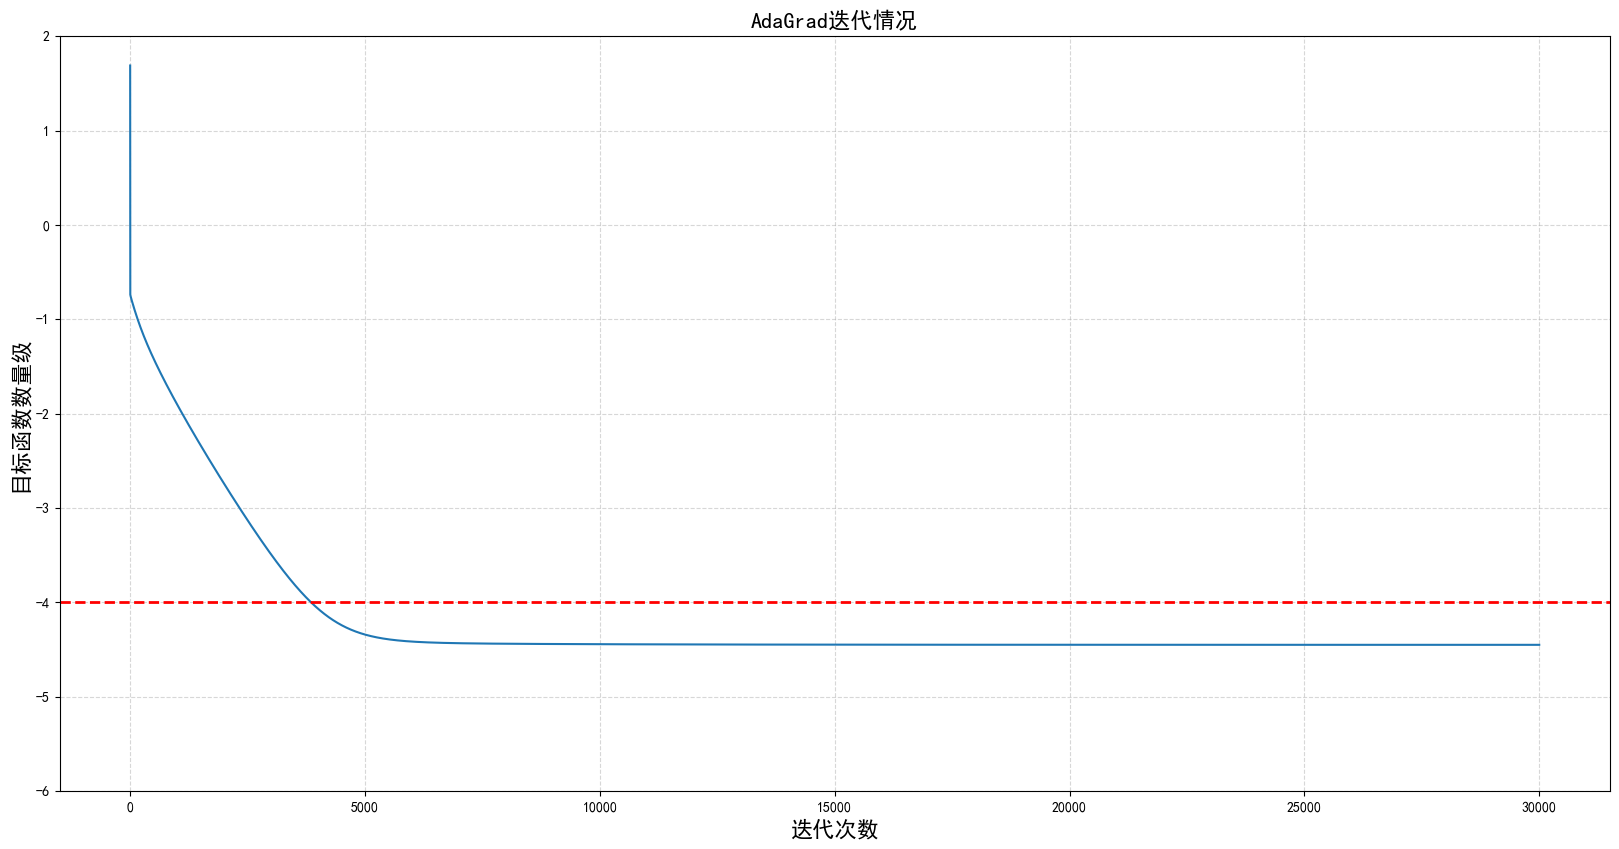

In [26]:
start = np.array([1,2,1,1,1,1])
start.shape = (6,)
value, point, y1 = AdaGradDescent(start, loop_num=30000, eta=1, plot=True)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10),dpi=100)
plt.plot(np.arange(30000),np.log10(y1))
plt.grid(True,linestyle='--',alpha=0.5)
plt.yticks(range(-6,3,1))
plt.axhline(y=-4, c="r", ls="--", lw=2)
plt.xlabel("迭代次数",fontdict={'size': 16})
plt.ylabel("目标函数数量级",fontdict={'size': 16})
plt.title("AdaGrad迭代情况",fontdict={'size': 16})

### AdaDelta

Text(0.5, 1.0, 'AdaDelta改迭代情况')

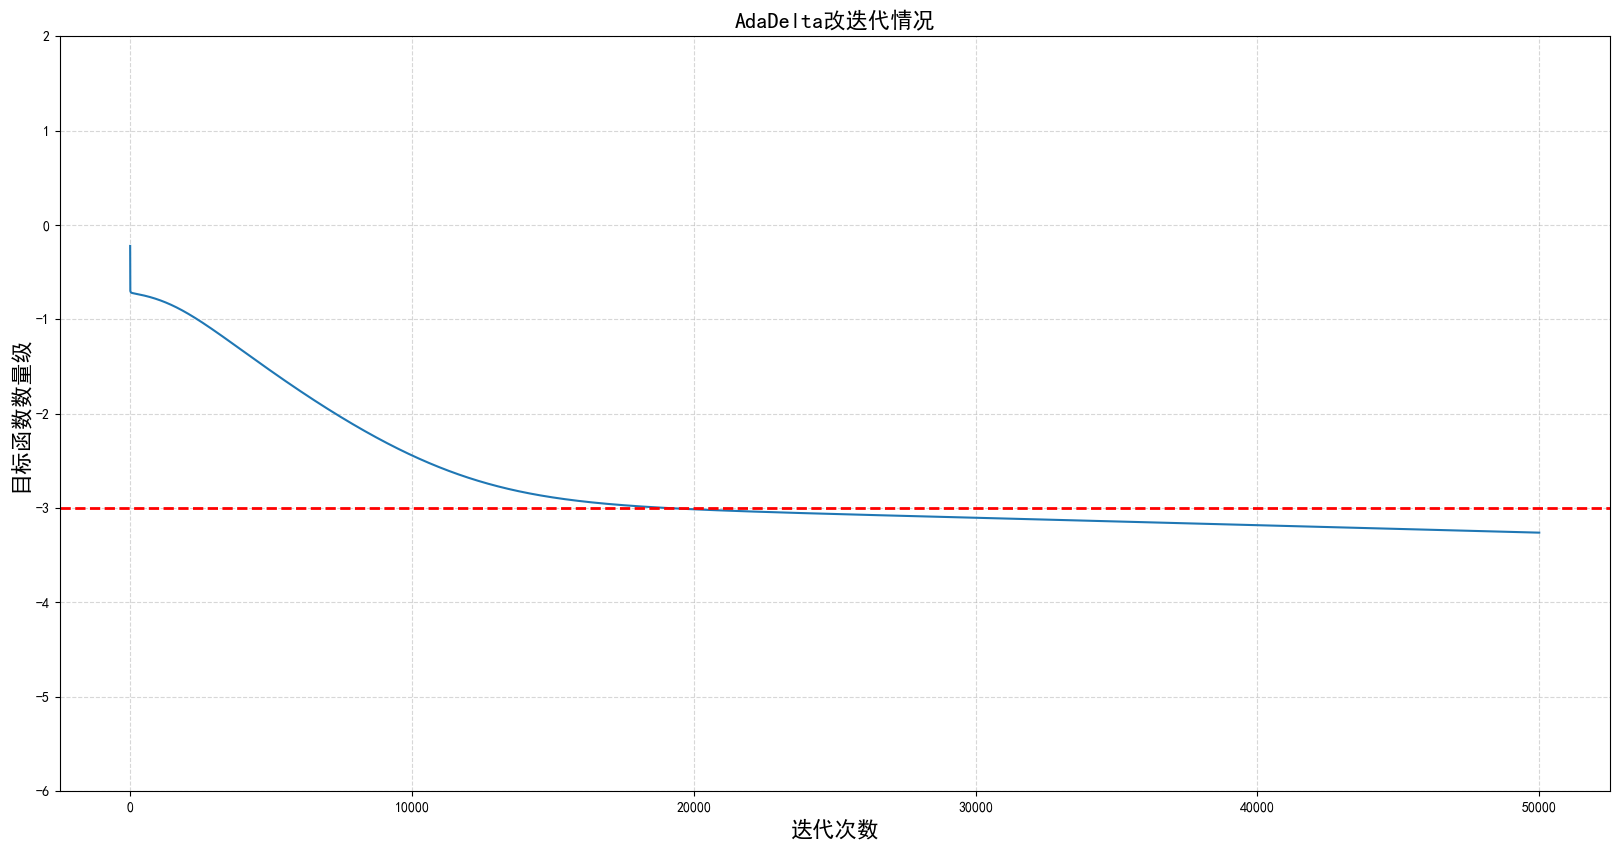

In [40]:
value2, point2, y2 = adaDeltaDescent2(start, 50000, 0.99, plot=True)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10),dpi=100)
plt.plot(np.arange(50000),np.log10(y2))
plt.grid(True,linestyle='--',alpha=0.5)
plt.axhline(y=-3, c="r", ls="--", lw=2)
plt.yticks(range(-6,3,1))
plt.xlabel("迭代次数",fontdict={'size': 16})
plt.ylabel("目标函数数量级",fontdict={'size': 16})
plt.title("AdaDelta改迭代情况",fontdict={'size': 16})

## 最终结果对比

|算法|5000次迭代精度|收敛所需迭代次数|最终收敛精度|
|:----: |:----: |:----: |:-----------: |
|梯度下降|$2.694167\times10^{-3}$|10000|$2.121201\times10^{-3}$|
|AdaGrad|$4.562533\times10^{-5}$|7500|$3.550827\times10^{-4}$|
|AdaDelta|$2.828306\times10^{-2}$|50000|$5.481664\times10^{-4}$|